# Probability Distribution Cookie Cutters in Python

In the spirit of Valentine's Day, we at Fast Forward Labs thought it would be fun to bake cookies for our sweethearts. Being DIY nerds, we thought we'd math it up a bit.

We used python's `numpy` library to generate probability distributions and `matplotlib` to check our disributions. Then we wrote a python function to generate a SCAD file defining three-dimensional shapes from the distributions. Using [OpenSCAD](OPENSCAD LINK), an open-source CAD program, we checked the 3D models and exported them to STL files for printing. We used a 5th Generation [MakerBot Replicator](MAKERBOT REP5 LINK) to print our 3D models. And we baked cookies.

Here's the process we used in case you want to make your own. We start with `numpy` to generate our distributions, and `matplotlib` so we can visualize the output.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

We chose a beta distribution because it's well behaved for purposes of making a 3D printed object. 
* A beta distribution only has values from 0 to 1. This gives us a fixed-width shape to work with. (Compare a Gaussian distribution, which has long tails on both sides.) 
* The area under the curve of a beta distribution is necessarily 1, which helps keep the shape from getting _too_ eccentric while allowing flexibility in choice of parameters, and thus a wider range of shapes.

First, we chose a number of bins, `numbins`, for our distribution. This value should be high enough to have a smooth curve, but low enough to not make it slow to render in OpenSCAD (and slower to 3D print). We also chose an odd-numbered value for `numbins` so our plot (and thus our shape) has a clear peak.

We used `numpy`'s `linspace` function to create a set of x-axis points. `linspace` gives us `X`, a set of `numbins` points, evenly spaced between 0 and 1 (the domain of a beta distribution).

We chose parameters for the beta distribution that make a nice, easily printable shape. You can adjust these parameters to get different shapes as you prefer.

In [46]:
# choose enough bins to have a relatively smooth curve without 
# creating so many facets that the 3D printer is slow
#
# choose an odd number so there is a definitive peak to the curve
numbins = 35

# set up linspace
X = np.linspace(0, 1, numbins)

# beta distribution parameters
a, b = 2, 1.6

# get beta distribution array
betadist = beta.pdf(X, a, b)

For the sake of clarity, here are the values of our x-axis points in `X` and the values we get from our beta distribution in `betadist`. Note that each is `numbins` long - `X` and `betadist` respectively give the x- and y-values for our plot.

In [47]:
print('X =\n', X)
print('betadist =\n', betadist)

X =
 [0.         0.02941176 0.05882353 0.08823529 0.11764706 0.14705882
 0.17647059 0.20588235 0.23529412 0.26470588 0.29411765 0.32352941
 0.35294118 0.38235294 0.41176471 0.44117647 0.47058824 0.5
 0.52941176 0.55882353 0.58823529 0.61764706 0.64705882 0.67647059
 0.70588235 0.73529412 0.76470588 0.79411765 0.82352941 0.85294118
 0.88235294 0.91176471 0.94117647 0.97058824 1.        ]
betadist =
 [0.         0.12018089 0.2359647  0.34726845 0.45400413 0.5560782
 0.65339098 0.74583603 0.83329938 0.9156586  0.9927818  1.06452643
 1.13073782 1.19124747 1.24587106 1.2944059  1.33662798 1.37228823
 1.40110782 1.42277236 1.43692427 1.44315298 1.44098179 1.4298501
 1.40908861 1.37788375 1.33522484 1.27982224 1.20997346 1.12332924
 1.016446   0.88381529 0.71531122 0.4866772  0.        ]


Next we do a quick plot of the distribution. This step isn't necessary, but gives us a preview of the shape of the cookie we're going to end up with.

We can also save the shape to a scalable vector graphics file (SVG) to inspect visually, or for use in other CAD programs, if you have one.

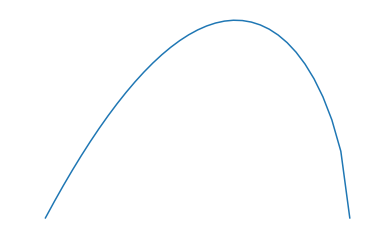

In [49]:
# turn off the axes so we only see the curve
plt.axis('off')

# plot the curve itself
plt.plot(X, betadist)

# save the SVG file - ending the filename with SVG is enough to set the type
plt.savefig('beta.svg')

Now we get to the meat of the job. The function below generates a `.scad` file, which OpenSCAD (and other CAD programs) can use to render the objects.

There are two main parts to the `.scad` file. The first defines the points of the polygon we're generating. The second performs some CAD operations to generate a cookie-cutter-like 3D object from the polygon.



In [52]:
def make_openscad(X, Y, filename):
    
    # open a file to store our SCAD instructions
    with open(filename, "w+") as fd:
        
        # first, we define the polygon
        # build a string containing each point of the polygon (plot) describing the distribution
        points = ""
        for x, y in zip(X, Y):
            points += "\t[{}, {}],\n".format(x, y)
            
        # write the point string to the file in SCAD format
        fd.write("""
points = [
{}];""".format(points))
        
        # next, we write SCAD instructions to turn the polygons into solid 3D objects and arrange them into a cookie cutter
        # - create two solid shapes from the polygon points defined above 
        # - index the first shape over to center it on origin
        # - scale up the other shape a bit and index in three dimensions to surround the smaller polygon
        # - subtract the smaller shape from the larger shape, leaving a scaled up shape with a smaller-shape hole in it
        # - this should give us a cookie cutter
        fd.write("""
difference(){
    
    //outer ring
    linear_extrude(0.4)
        translate([-0.53, -0.03, -0.1])
            scale(1.05, 1.05, 1.05)
                polygon(points);        
    
    //inner distribution to be subtracted
    linear_extrude(0.5)
        translate([-0.5, 0, 0])
            polygon(points);
}""")

# and now we run the function to make our SCAD file
make_openscad(X, betadist, "beta.scad")

Now we have a file to load into OpenSCAD.

Explain next steps in openscad here
- load file
- render
- adjust parameters to your liking

[SHOULD LOOK LIKE THIS? - ADD image below?](IMAGE LINK)

- export STL file

OpenSCAD save to XYZ format

Import to printer software and PRINT

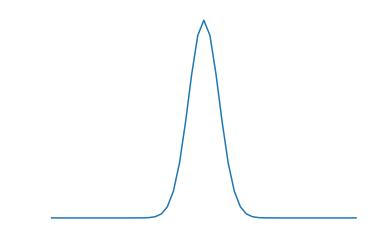

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import norm

#TODO: CONVERT TO NUMPY NORMAL DISTRIBUTION
#norm = np.random.normal(0, 1, 100)
x_axis = np.linspace(0, 1, 51)
norm = norm.pdf(x_axis, 0.5, 0.05) # find normalized analog
norm /= sum(norm)

plt.axis('off')
plt.plot(norm)
make_openscad(x_axis, norm, "normal.scad")
plt.savefig('norm.svg')

In [14]:
norm

array([3.07783945e-23, 1.55124477e-21, 6.66235213e-20, 2.43830325e-18,
       7.60432615e-17, 2.02090843e-15, 4.57662596e-14, 8.83195985e-13,
       1.45238460e-11, 2.03525611e-10, 2.43035314e-09, 2.47304820e-08,
       2.14441414e-07, 1.58451964e-06, 9.97698852e-06, 5.35320903e-05,
       2.44760772e-04, 9.53635281e-04, 3.16618063e-03, 8.95781212e-03,
       2.15963866e-02, 4.43683339e-02, 7.76744220e-02, 1.15876621e-01,
       1.47308056e-01, 1.59576912e-01, 1.47308056e-01, 1.15876621e-01,
       7.76744220e-02, 4.43683339e-02, 2.15963866e-02, 8.95781212e-03,
       3.16618063e-03, 9.53635281e-04, 2.44760772e-04, 5.35320903e-05,
       9.97698852e-06, 1.58451964e-06, 2.14441414e-07, 2.47304820e-08,
       2.43035314e-09, 2.03525611e-10, 1.45238460e-11, 8.83195985e-13,
       4.57662596e-14, 2.02090843e-15, 7.60432615e-17, 2.43830325e-18,
       6.66235213e-20, 1.55124477e-21, 3.07783945e-23])

In [15]:
max(norm)

0.15957691216057304

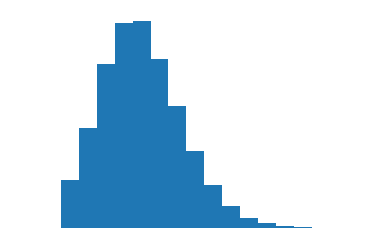

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x_axis = np.linspace(0, 1, 17)
poisson = np.random.poisson(5, 100000)
#normedpoisson = [float(i)/max(poisson) for i in poisson]

plt.axis('off')
plt.hist(poisson, bins = 17)
make_openscad(x_axis, poisson, "poisson.scad")
plt.savefig('poisson.svg')

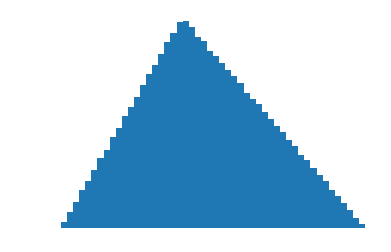

In [17]:
import numpy as np
import matplotlib.pyplot as plt

triangle = np.random.triangular(0, 0.4, 1, 1000000)
plt.axis('off')
plt.hist(triangle, bins = 50)
plt.savefig('triangle.svg')